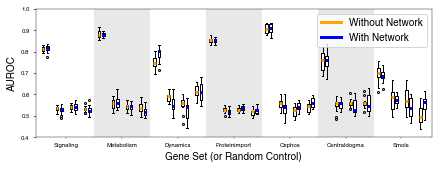

In [2]:
import matplotlib as mpl
full_width = 18
cm = 1/2.54
small_font = 6
medium_font = 8
large_font = 10
mpl.rc('xtick', labelsize=small_font)
mpl.rc('ytick', labelsize=small_font)
mpl.rcParams['axes.linewidth'] = 0.4
mpl.rcParams['ytick.major.size'] = 3
mpl.rcParams['ytick.major.width'] = 0.5
mpl.rcParams['ytick.minor.size'] = 2
mpl.rcParams['ytick.minor.width'] = 0.3
mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 0.3
mpl.rcParams['xtick.minor.size'] = 1
mpl.rcParams['xtick.minor.width'] = 0.1

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np

stride = 16
handles = []

fig, ax = plt.subplots(figsize=(full_width*cm, 6*cm))

for method, color, location in zip(["mlp", "tag"], ["orange", "blue"], [-0.15, 0.15]):
    df = pd.read_csv("../mt_{}_benchmark_random_sets.tsv".format(method), sep="\t", header=0, index_col=0)
    previous = 0
    nested_results= []
    for i in range(stride, len(df)+1, stride):
        nested_results.append(df.iloc[previous:i, :]["auroc"])
        previous = i

    bp = ax.boxplot(x=nested_results, positions=np.asarray(range(len(nested_results))) + location, widths=0.2, flierprops={'marker': 'o', 'markersize': 2})

    for median in bp['medians']:
        median.set(color=color,
        linewidth=3, solid_capstyle="butt")

    for artist in bp['boxes']:
        patch = mpatches.PathPatch(artist.get_path(), color="white")
        ax.add_artist(patch)

handles = [Line2D([0], [0], color="orange", lw=3),
           Line2D([0], [0], color="blue", lw=3)
            ]

labels = set([path.split("mt")[2].split("rep")[0].capitalize() for sets in nested_results for path in sets.index])

ax.set_xticks( np.asarray(range(1, 28, 4)) + 0.5)
ax.set_xticklabels(labels)

ax.axvspan(3.5, 7.5, facecolor='lightgray', alpha=0.5, zorder=-1)

ax.axvspan(11.5, 15.5, facecolor='lightgray', alpha=0.5, zorder=-1)

ax.axvspan(19.5, 23.5, facecolor='lightgray', alpha=0.5, zorder=-1)
ax.legend(handles, ["Without Network", "With Network"])
ax.set_ylim(0.4, 1)
ax.set_xlabel("Gene Set (or Random Control)")
ax.set_ylabel("AUROC")
plt.savefig("xeno_AUROC.svg",  bbox_inches="tight")

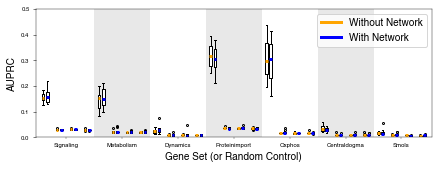

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np

stride = 16


fig, ax = plt.subplots(figsize=(full_width*cm, 6*cm))

for method, color, location in zip(["mlp", "tag"], ["orange", "blue"], [-0.15,  0.15]):
    df = pd.read_csv("../mt_{}_benchmark_random_sets.tsv".format(method), sep="\t", header=0, index_col=0)
    previous = 0
    nested_results= []
    for i in range(stride, len(df)+1, stride):
        nested_results.append(df.iloc[previous:i, :]["auprc"])
        previous = i

    bp = ax.boxplot(x=nested_results, positions=np.asarray(range(len(nested_results))) + location, widths=0.2, flierprops={'marker': 'o', 'markersize': 2})

    for median in bp['medians']:
        median.set(color=color,
        linewidth=3, solid_capstyle="butt")

    for artist in bp['boxes']:
        patch = mpatches.PathPatch(artist.get_path(), color="white")
        ax.add_artist(patch)

handles = [Line2D([0], [0], color="orange", lw=3),
           Line2D([0], [0], color="blue", lw=3)
            ]

labels = set([path.split("mt")[2].split("rep")[0].capitalize() for sets in nested_results for path in sets.index])

ax.set_xticks( np.asarray(range(1, 28, 4)) + 0.5)
ax.set_xticklabels(labels)

ax.axvspan(3.5, 7.5, facecolor='lightgray', alpha=0.5, zorder=-1)

ax.axvspan(11.5, 15.5, facecolor='lightgray', alpha=0.5, zorder=-1)

ax.axvspan(19.5, 23.5, facecolor='lightgray', alpha=0.5, zorder=-1)
ax.legend(handles, ["Without Network", "With Network"])
ax.set_ylim(0, 0.5)
ax.set_xlabel("Gene Set (or Random Control)")
ax.set_ylabel("AUPRC")
plt.savefig("xeno_AUPRC.svg", bbox_inches="tight")
